In [2]:
import numpy as np
import pandas as pd
import random
from datetime import datetime, timedelta

In [5]:
df = "/content/predictive_maintenance_data_raw.csv"
df = pd.read_csv(df)

EDA

In [6]:
print(f"Shape: {df.shape}")
print("\Info:")
print(df.info())

print("\Description:")
print(df.describe())

Shape: (1000, 10)
\Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   device_id           1000 non-null   object 
 1   device_type         1000 non-null   object 
 2   inspection_date     1000 non-null   object 
 3   usage_hours         1000 non-null   int64  
 4   avg_temperature     1000 non-null   float64
 5   vibration_level     1000 non-null   float64
 6   error_logs_count    1000 non-null   int64  
 7   pressure_variation  1000 non-null   float64
 8   last_maintenance    1000 non-null   int64  
 9   failure             1000 non-null   int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 78.3+ KB
None
\Description:
       usage_hours  avg_temperature  vibration_level  error_logs_count  \
count  1000.000000      1000.000000      1000.000000       1000.000000   
mean   2578.250000        49.798380         0.50529

Histograms and boxplots

<Figure size 1200x1000 with 0 Axes>

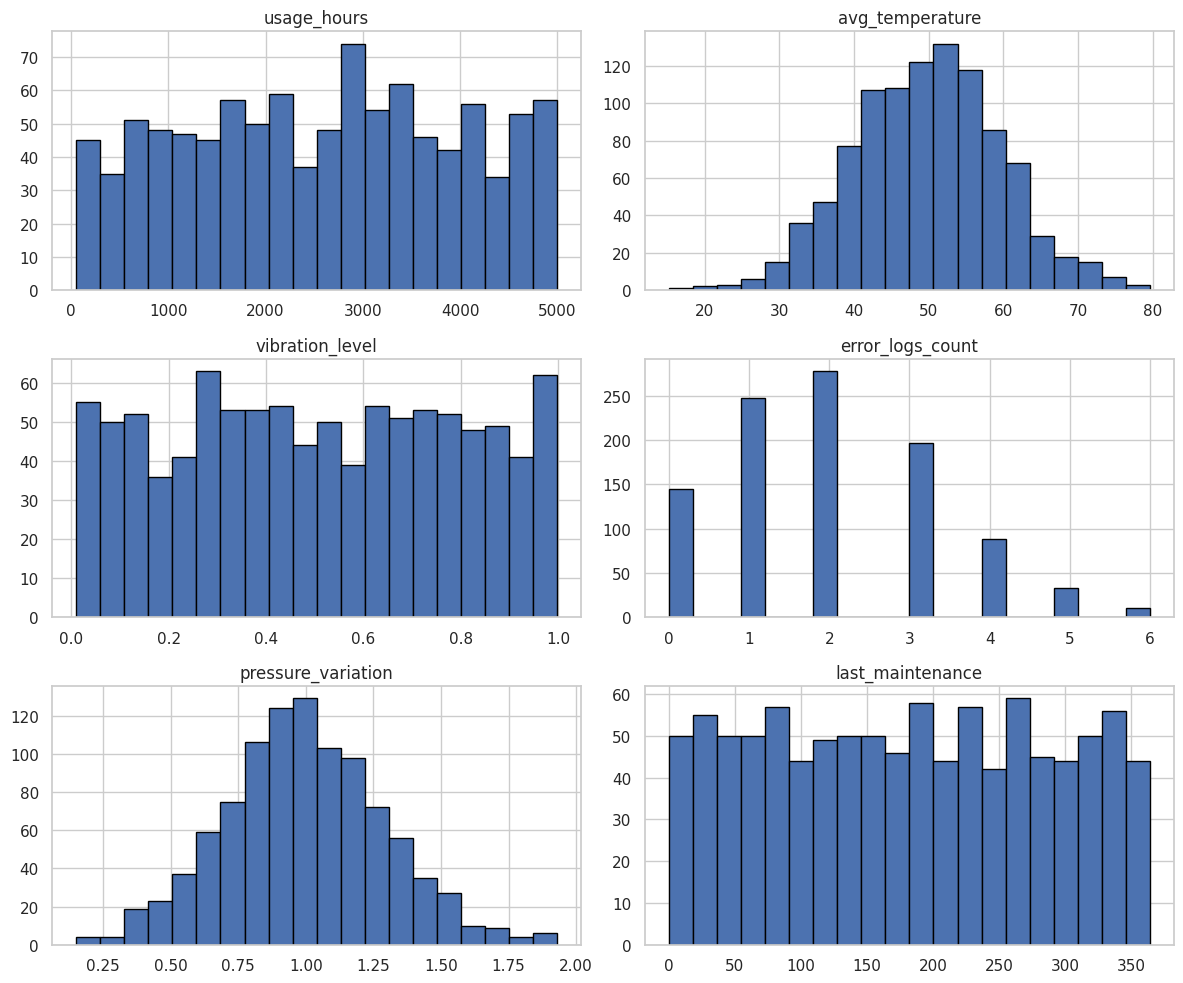

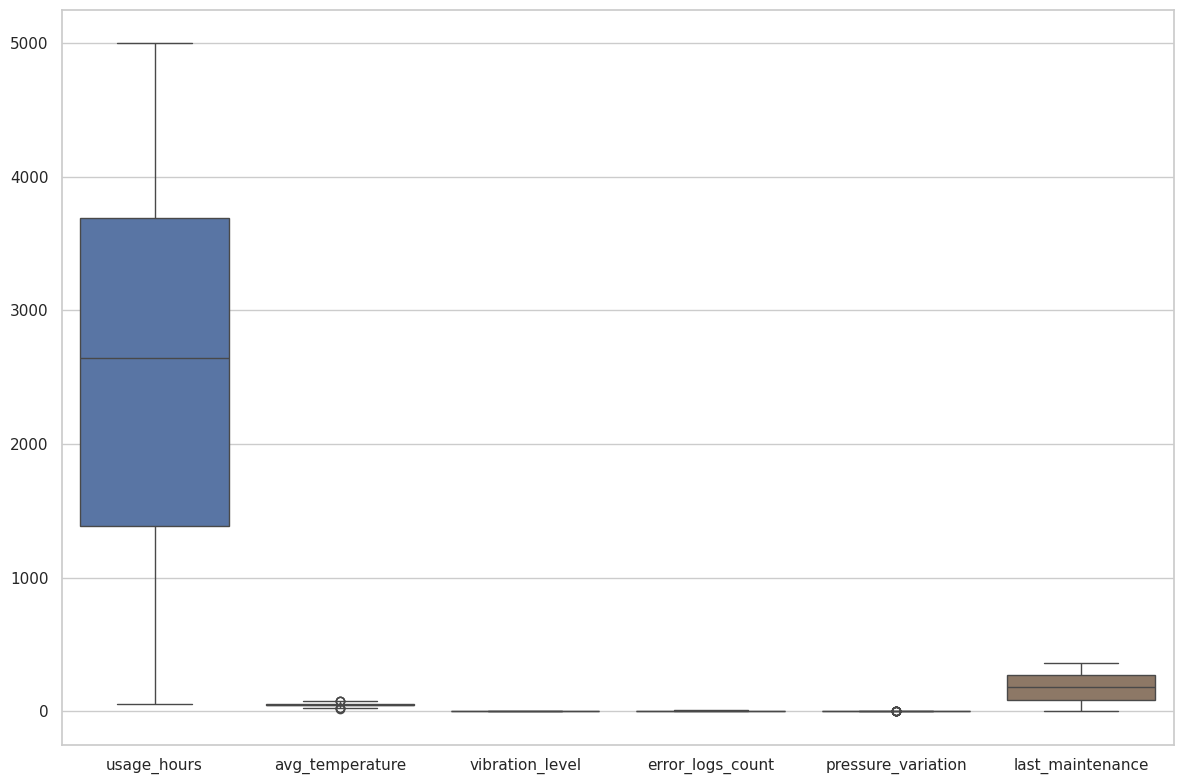

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.figure(figsize=(12, 10))

df[['usage_hours', 'avg_temperature', 'vibration_level', 'error_logs_count', 'pressure_variation', 'last_maintenance']].hist(bins=20, edgecolor='black', figsize=(12, 10))
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['usage_hours', 'avg_temperature', 'vibration_level', 'error_logs_count', 'pressure_variation', 'last_maintenance']])
plt.tight_layout()
plt.show()

Heatmap of numerical correlations

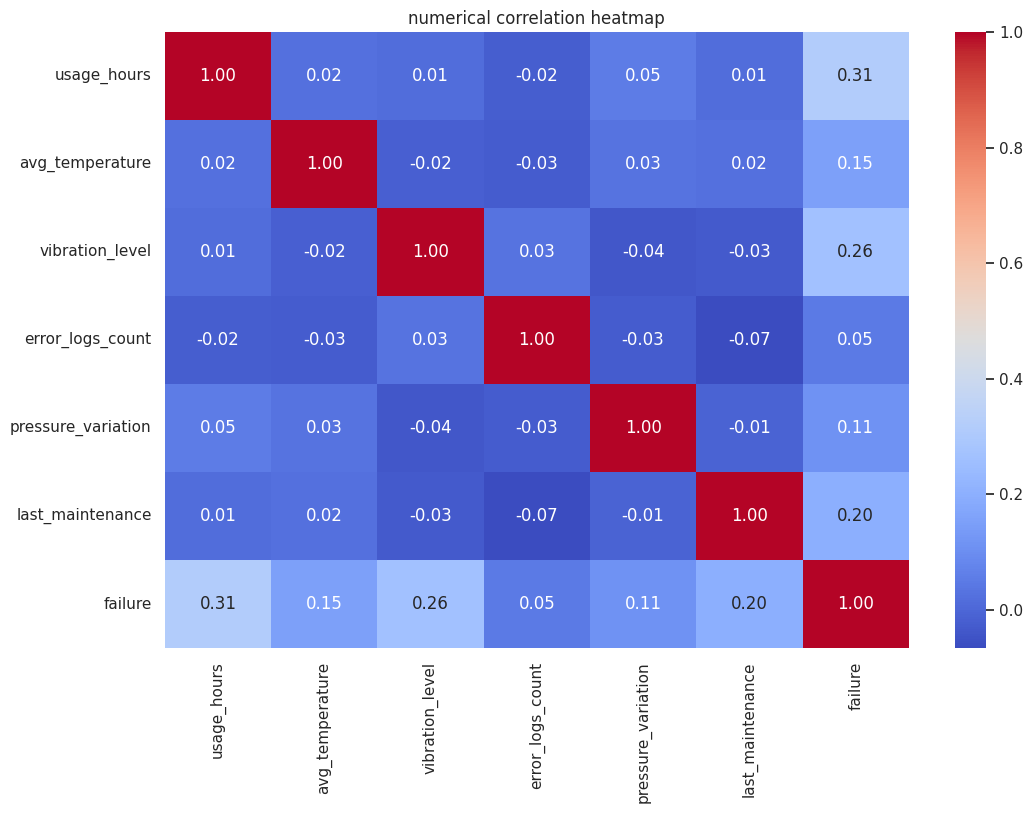

In [8]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("numerical correlation heatmap")
plt.show()

Scatterplot for 2 numerical variables

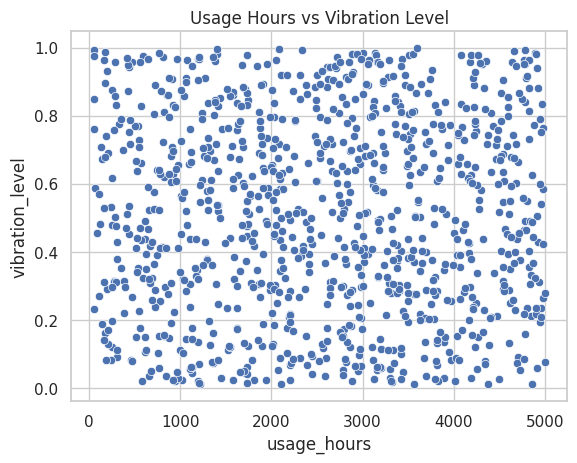

In [9]:
sns.scatterplot(x='usage_hours', y='vibration_level', data=df)
plt.title('Usage Hours vs Vibration Level')
plt.show()

Boxplot for numerical vs. categorical

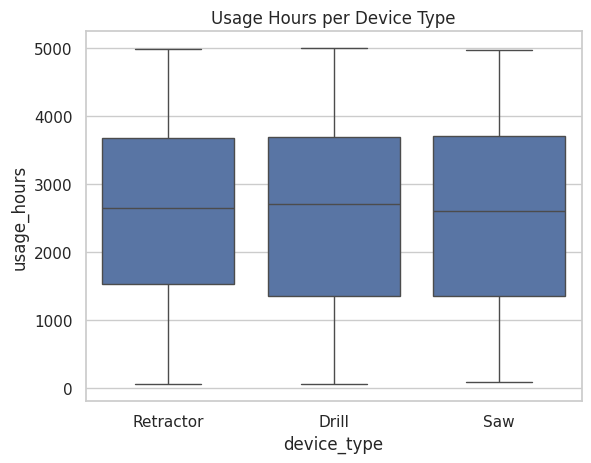

In [10]:
sns.boxplot(x='device_type', y='usage_hours', data=df)
plt.title('Usage Hours per Device Type')
plt.show()

Contingency matrix for categorical

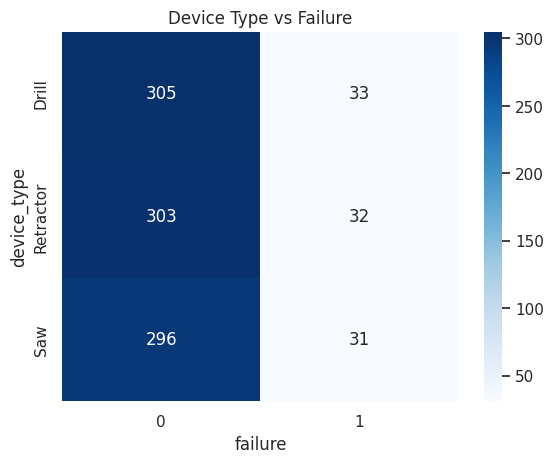

In [11]:
contingency = pd.crosstab(df['device_type'], df['failure'])
sns.heatmap(contingency, annot=True, cmap='Blues', fmt='d')
plt.title('Device Type vs Failure')
plt.show()

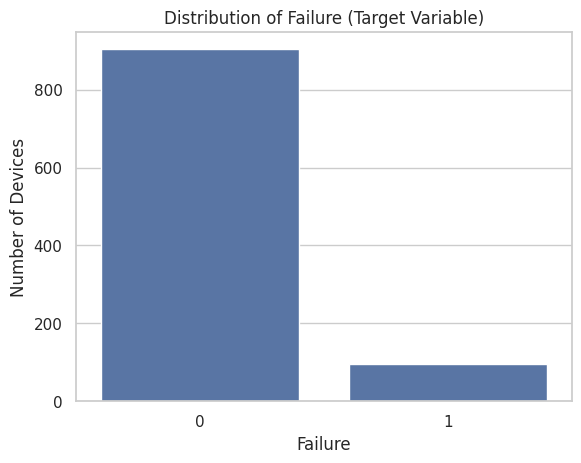

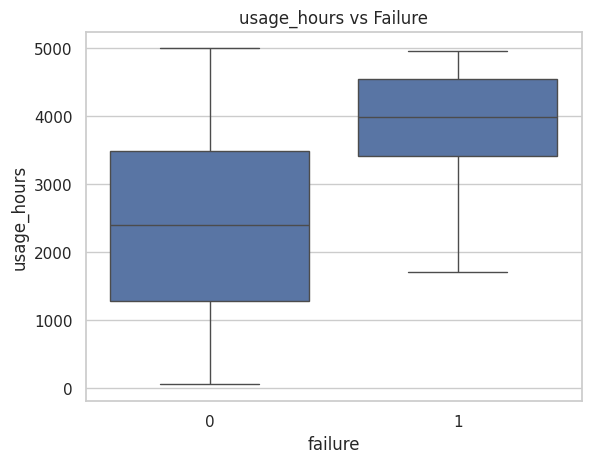

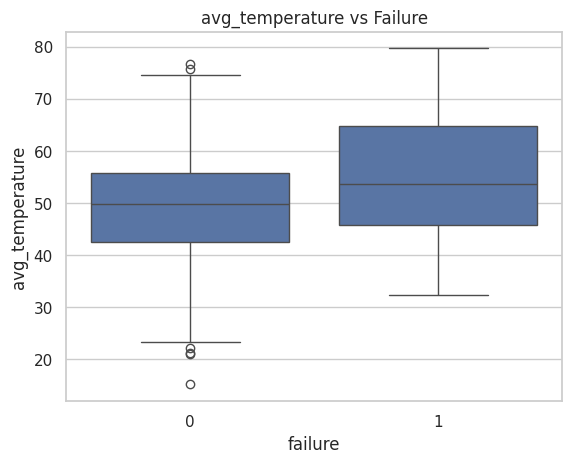

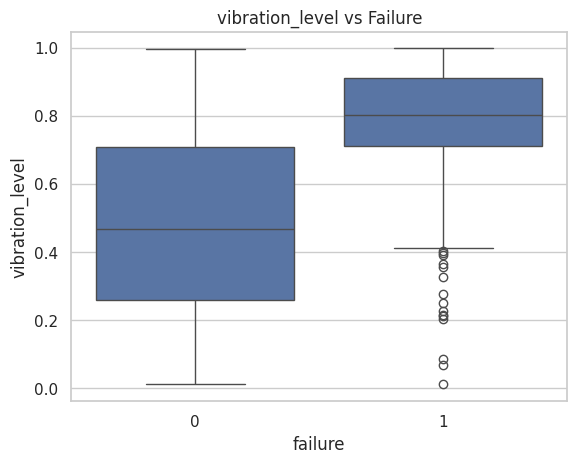

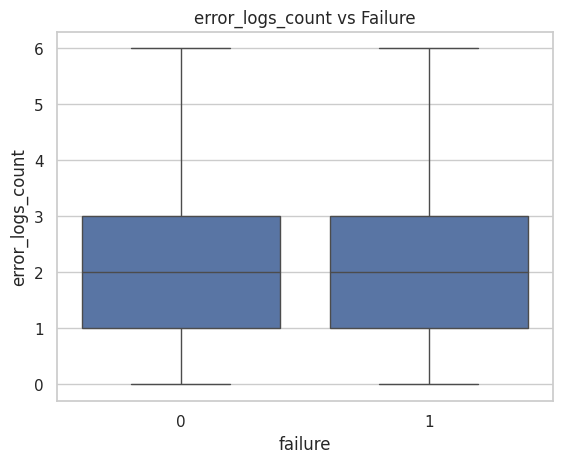

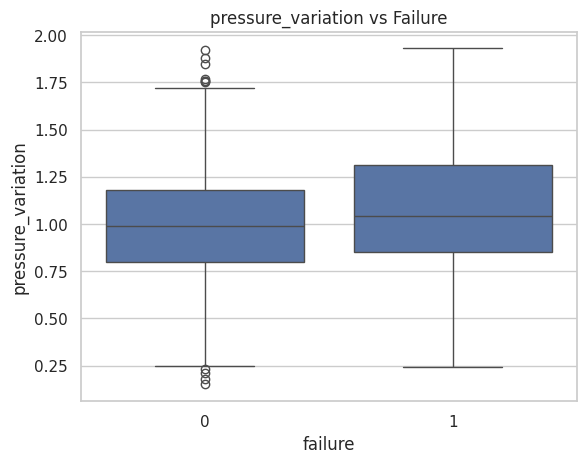

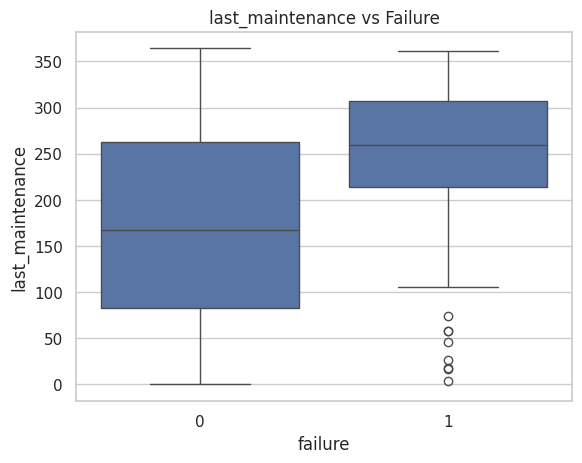

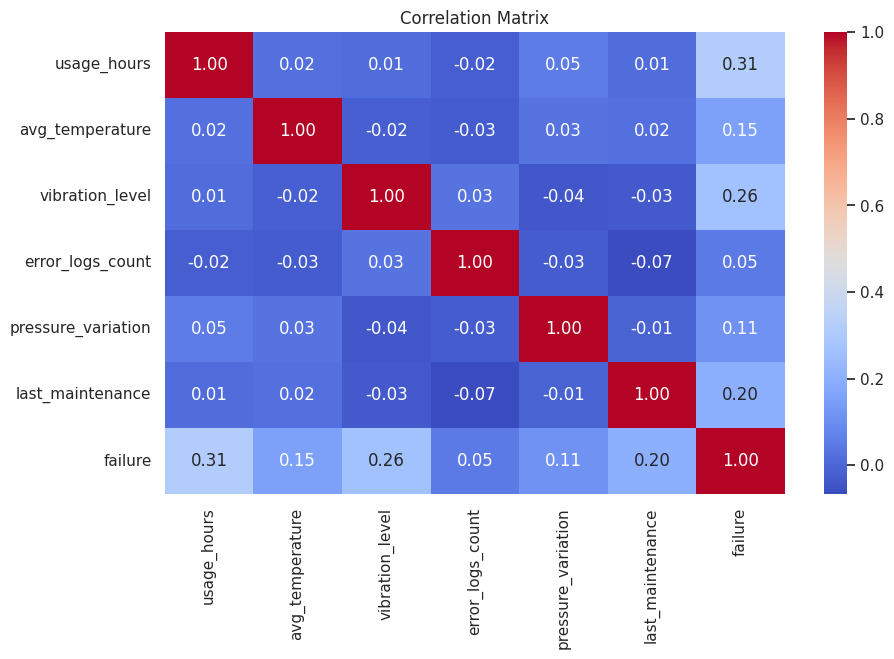

Missing values per column:
 device_id             0
device_type           0
inspection_date       0
usage_hours           0
avg_temperature       0
vibration_level       0
error_logs_count      0
pressure_variation    0
last_maintenance      0
failure               0
dtype: int64


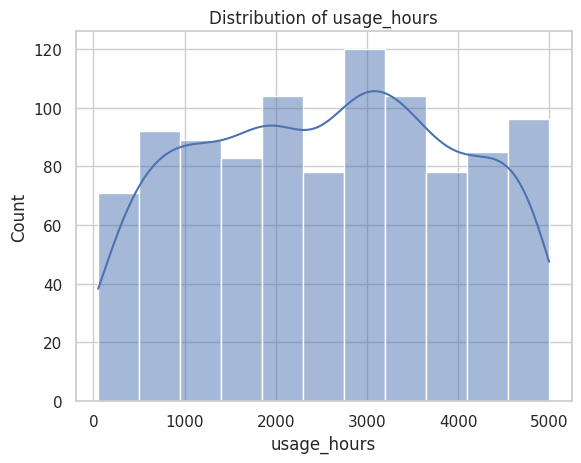

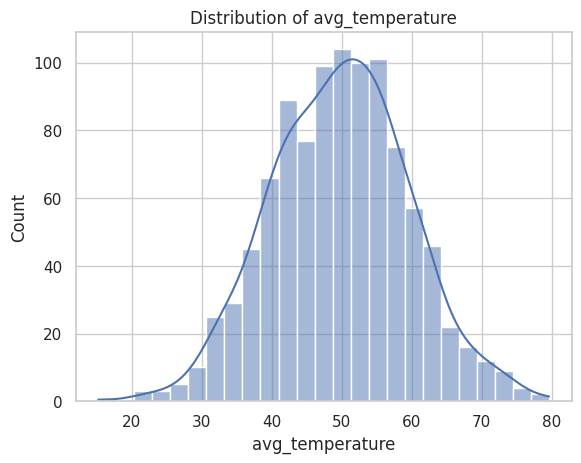

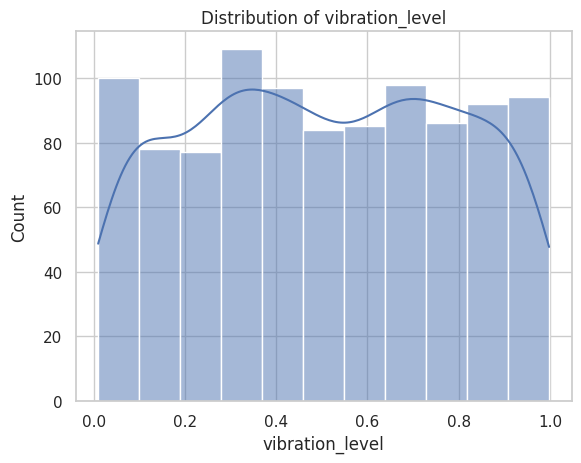

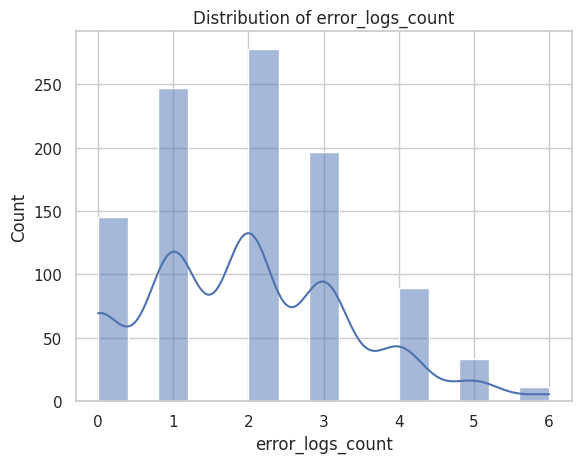

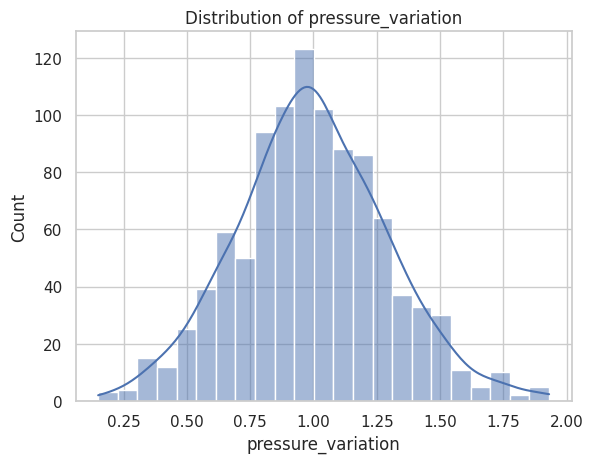

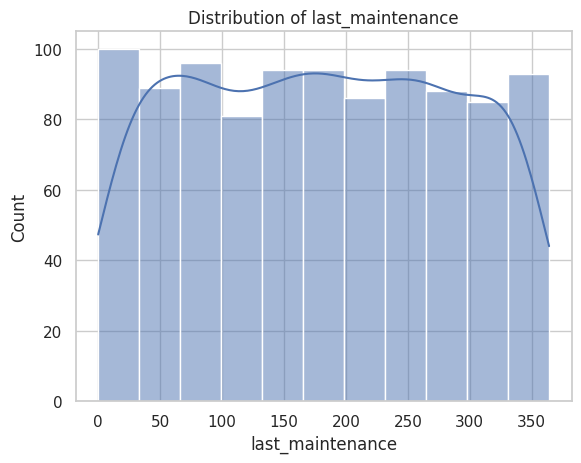

Number of outliers per column:
 {'usage_hours': 0, 'avg_temperature': 3, 'vibration_level': 0, 'error_logs_count': 0, 'pressure_variation': 3, 'last_maintenance': 0}


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

#Visualize the target distribution
sns.countplot(x='failure', data=df)
plt.title('Distribution of Failure (Target Variable)')
plt.xlabel('Failure')
plt.ylabel('Number of Devices')
plt.show()

#Boxplots for numerical features vs Failure
numerical_cols = ['usage_hours', 'avg_temperature', 'vibration_level',
                  'error_logs_count', 'pressure_variation', 'last_maintenance']

for col in numerical_cols:
    sns.boxplot(x='failure', y=col, data=df)
    plt.title(f'{col} vs Failure')
    plt.show()

#3. Correlation matrix
corr = df[numerical_cols + ['failure']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

#Missing values check
print("Missing values per column:\n", df.isnull().sum())

#Convert date column to datetime
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

#Distribution plots for numeric features ---
for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

#7. Outlier detection using Z-score
z_scores = np.abs(zscore(df[numerical_cols]))
outliers = (z_scores > 3).sum(axis=0)
print("Number of outliers per column:\n", dict(zip(numerical_cols, outliers)))

Cross-tab device_type/failure

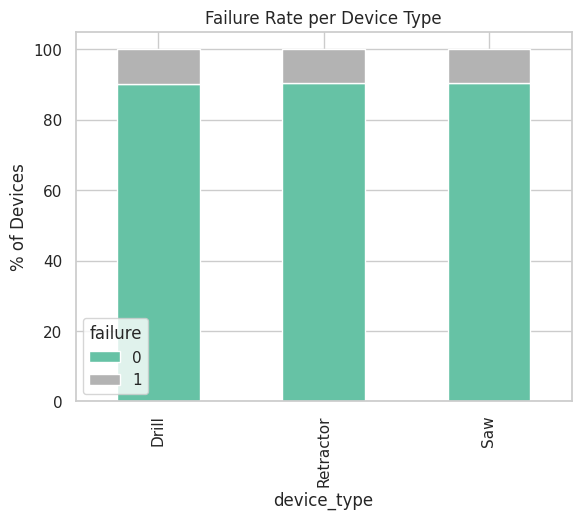

In [14]:
device_failure_rate = pd.crosstab(df['device_type'], df['failure'], normalize='index') * 100
device_failure_rate.plot(kind='bar', stacked=True, colormap='Set2')
plt.title('Failure Rate per Device Type')
plt.ylabel('% of Devices')
plt.show()

In [16]:
pd.crosstab(df['device_type'], df['failure'], normalize='index') * 100

failure,0,1
device_type,,
Drill,90.236686,9.763314
Retractor,90.447761,9.552239
Saw,90.519878,9.480122


Temporal trend on inspection_date

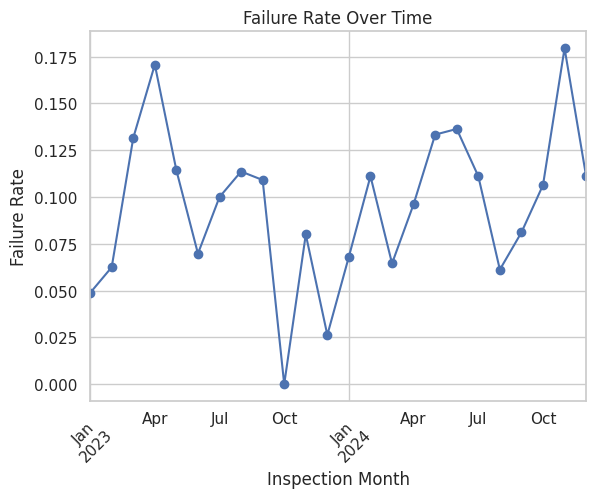

In [15]:
df['inspection_month'] = df['inspection_date'].dt.to_period('M')
monthly_failures = df.groupby('inspection_month')['failure'].mean()

monthly_failures.plot(marker='o')
plt.title('Failure Rate Over Time')
plt.ylabel('Failure Rate')
plt.xlabel('Inspection Month')
plt.xticks(rotation=45)
plt.show()

In [17]:
# Convert date
df['inspection_date'] = pd.to_datetime(df['inspection_date'])

# Extract useful time features
df['inspection_month'] = df['inspection_date'].dt.month
df['inspection_weekday'] = df['inspection_date'].dt.weekday
df['days_since_inspection'] = (pd.to_datetime('2025-01-01') - df['inspection_date']).dt.days

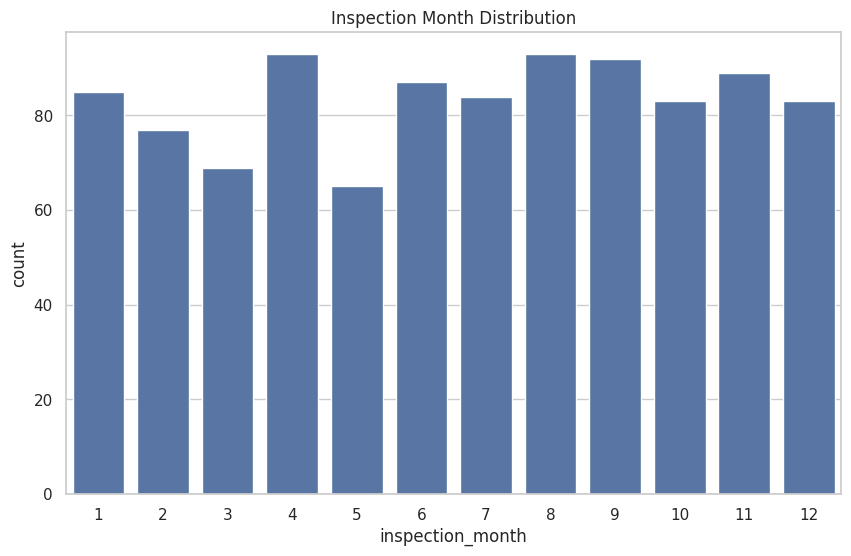

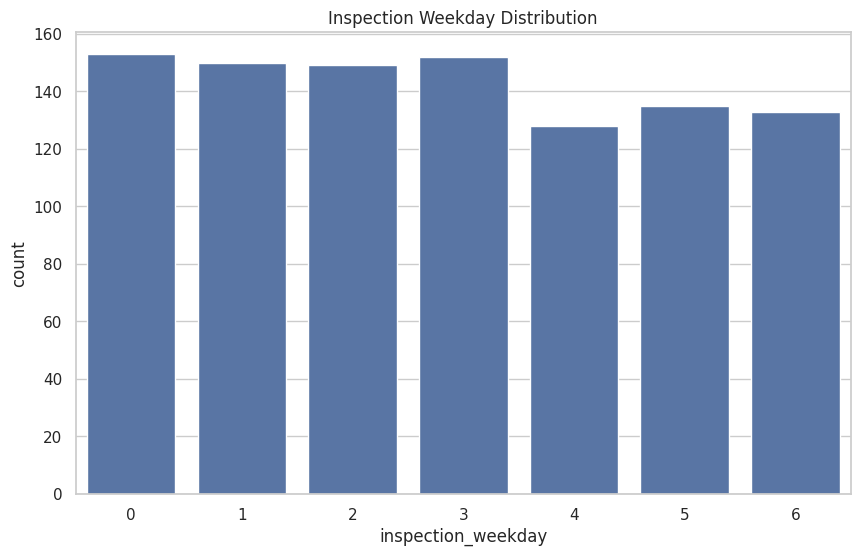

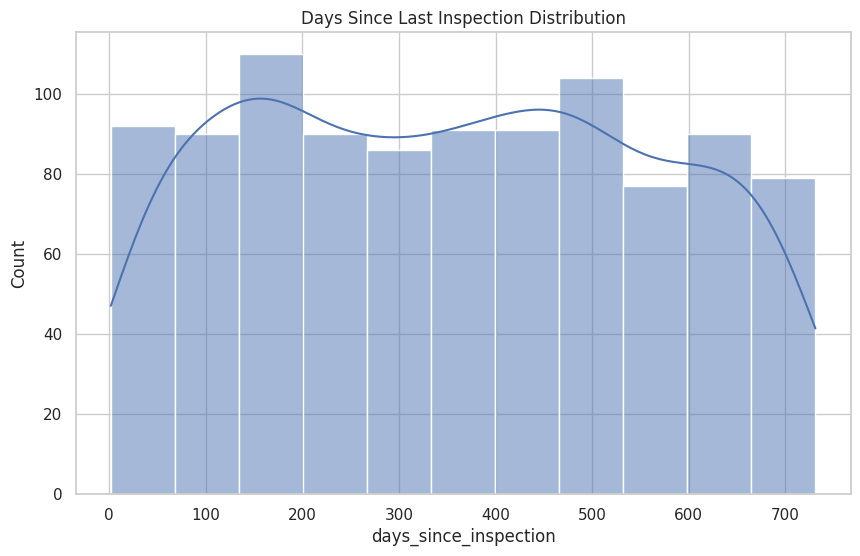

In [18]:
# Checking distribution of the new features
df[['inspection_month', 'inspection_weekday', 'days_since_inspection']].describe()

# Visualizing the new features
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of inspection months
plt.figure(figsize=(10, 6))
sns.countplot(x='inspection_month', data=df)
plt.title('Inspection Month Distribution')
plt.show()

# Distribution of inspection weekdays
plt.figure(figsize=(10, 6))
sns.countplot(x='inspection_weekday', data=df)
plt.title('Inspection Weekday Distribution')
plt.show()

# Distribution of days since last inspection
plt.figure(figsize=(10, 6))
sns.histplot(df['days_since_inspection'], kde=True)
plt.title('Days Since Last Inspection Distribution')
plt.show()

In [19]:
# Display the first few rows of the dataset
df.head()

# Show a summary of the dataset
df.info()

# Display summary statistics for numerical columns
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   device_id              1000 non-null   object        
 1   device_type            1000 non-null   object        
 2   inspection_date        1000 non-null   datetime64[ns]
 3   usage_hours            1000 non-null   int64         
 4   avg_temperature        1000 non-null   float64       
 5   vibration_level        1000 non-null   float64       
 6   error_logs_count       1000 non-null   int64         
 7   pressure_variation     1000 non-null   float64       
 8   last_maintenance       1000 non-null   int64         
 9   failure                1000 non-null   int64         
 10  inspection_month       1000 non-null   int32         
 11  inspection_weekday     1000 non-null   int32         
 12  days_since_inspection  1000 non-null   int64         
dtypes: d

,inspection_date,usage_hours,avg_temperature,vibration_level,error_logs_count,pressure_variation,last_maintenance,failure,inspection_month,inspection_weekday,days_since_inspection
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-01-10 06:02:52.800000,2578.250000,49.798380,0.505296,1.981000,0.994200,180.168000,0.096000,6.630000,2.889000,356.748000
min,2023-01-01 00:00:00,53.000000,15.190000,0.010000,0.000000,0.150000,0.000000,0.000000,1.000000,0.000000,2.000000
25%,2023-07-23 18:00:00,1389.500000,42.957500,0.275750,1.000000,0.800000,86.750000,0.000000,4.000000,1.000000,172.000000
50%,2024-01-12 00:00:00,2647.000000,49.965000,0.502500,2.000000,0.990000,180.500000,0.000000,7.000000,3.000000,355.000000
75%,2024-07-13 00:00:00,3693.250000,56.252500,0.751000,3.000000,1.190000,269.000000,0.000000,10.000000,5.000000,527.250000
max,2024-12-30 00:00:00,4998.000000,79.650000,0.998000,6.000000,1.930000,364.000000,1.000000,12.000000,6.000000,731.000000
std,NaN,1390.960625,9.812608,0.287230,1.361798,0.297168,105.150323,0.294739,3.443103,1.995661,208.635393


In [20]:
# Save the cleaned dataset to a CSV file
df.to_csv("cleaned_predictive_maintenance_data.csv", index=False)